In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from torchvision.transforms.functional import to_pil_image

In [3]:
# Hyperparameters
IN_CHANNEL = 3
NUM_CLASSES = 5
# LEARNING_RATE= 1e-3
BATCH_SIZE = 10
# NUM_EPOCHS = 1

In [4]:
class Aptos(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)  # some thousand images

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0] + '.png')
        image = io.imread(img_path)
        image = Image.fromarray(image)  # Convert NumPy array to PIL Image
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return image, y_label

In [5]:
# Define the transformation pipeline
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(15),  # Increased range for more variation
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(
        degrees=10,
        translate=(0.1, 0.1),
        scale=(0.8, 1.2),
        shear=15
    ),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.5),
    transforms.RandomResizedCrop((224, 224), scale=(0.7, 1.0)),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomInvert(p=0.1),
    transforms.RandomPosterize(bits=4, p=0.1),
    transforms.RandomSolarize(threshold=128, p=0.1),
    transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.1),
    transforms.RandomAutocontrast(p=0.1),
    #transforms.RandomEqualize(p=0.1),
    #transforms.RandomErasing(p=0.5, scale=(0.02, 0.1), ratio=(0.3, 3.3), value='random', inplace=False),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
# Load data
dataset = Aptos(
    csv_file='/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection/train.csv',
    root_dir='/content/drive/My Drive/AI4ALL Diabetic Retinopathy Research/Early ML Model/aptos2019-blindness-detection/train_images',
    transform=transform
)

# Split the dataset into training and testing sets

train_set, test_set  = torch.utils.data.random_split(dataset, [2929, 733]) # this splits the training data set -> need to fix
#train_set= np.array(train_set)
#print(train_set.shape)
print(len(train_set))
print(len(test_set))
# find a way to not split dataset and instead route to the test images path
# Create DataLoaders for training and testing sets

train_loader = DataLoader(dataset = train_set, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=BATCH_SIZE, shuffle=False)
print(len(train_loader))


2929
733
293


In [6]:
# Retrieve a single batch from the DataLoader
data_iter = iter(train_loader)
images, labels = next(data_iter)



Batch size: 10
Image dimensions: torch.Size([3, 224, 224])
Label type: <class 'torch.Tensor'>
First 5 labels in batch: [3 0 3 2 1]


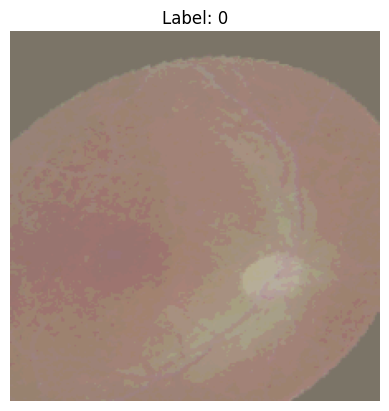

In [7]:
# Print information about the batch
print(f"Batch size: {images.shape[0]}")
print(f"Image dimensions: {images.shape[1:]}")  # Should be (3, 224, 224) for RGB images of size 224x224
print(f"Label type: {type(labels)}")
print(f"First 5 labels in batch: {labels[:5].numpy()}")

# Display the first image in the batch
import matplotlib.pyplot as plt

# Convert the first image to a format that can be displayed
img = images[9].numpy().transpose((1, 2, 0))  # Convert from CHW to HWC
img = img * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])  # Denormalize
img = np.clip(img, 0, 1)  # Clip values to be in the range [0, 1]

# Display the image
plt.imshow(img)
plt.title(f'Label: {labels[9].item()}')
plt.axis('off')
plt.show()


In [8]:
import numpy as np

data_iter = iter(train_loader)
images, labels = next(data_iter)
images_list = np.array(images)
labels_list = np.array(labels)

try:
    for images, labels in train_loader:
        images_list = np.append(images_list, np.array(images), axis=0)
        labels_list = np.append(labels_list, np.array(labels), axis=0)
        print("Image list shape: ", images_list.shape)
        print("Labels list shape: ", labels_list.shape)

except Exception as e:
    print(f"An error occurred: {e}")


print(f"Images array shape: {images_list.shape}")
print(f"Labels array shape: {labels_list.shape}")



Image list shape:  (20, 3, 224, 224)
Labels list shape:  (20,)
Image list shape:  (30, 3, 224, 224)
Labels list shape:  (30,)
Image list shape:  (40, 3, 224, 224)
Labels list shape:  (40,)
Image list shape:  (50, 3, 224, 224)
Labels list shape:  (50,)
Image list shape:  (60, 3, 224, 224)
Labels list shape:  (60,)
Image list shape:  (70, 3, 224, 224)
Labels list shape:  (70,)
Image list shape:  (80, 3, 224, 224)
Labels list shape:  (80,)
Image list shape:  (90, 3, 224, 224)
Labels list shape:  (90,)
Image list shape:  (100, 3, 224, 224)
Labels list shape:  (100,)
Image list shape:  (110, 3, 224, 224)
Labels list shape:  (110,)
Image list shape:  (120, 3, 224, 224)
Labels list shape:  (120,)
Image list shape:  (130, 3, 224, 224)
Labels list shape:  (130,)
Image list shape:  (140, 3, 224, 224)
Labels list shape:  (140,)
Image list shape:  (150, 3, 224, 224)
Labels list shape:  (150,)
Image list shape:  (160, 3, 224, 224)
Labels list shape:  (160,)
Image list shape:  (170, 3, 224, 224)
Lab

In [9]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(labels_list)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(images_list.reshape((2939, -1)), labels_list)

counter = Counter(y_train_sm)
print('After', counter)

Before Counter({0: 1445, 2: 796, 1: 303, 4: 240, 3: 155})
After Counter({0: 1445, 2: 1445, 4: 1445, 1: 1445, 3: 1445})


In [10]:

X_train_sm_reshaped = X_train_sm.reshape(-1, 3, 224, 224)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        return image, label

train_dataset = CustomDataset(X_train_sm_reshaped, y_train_sm)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
print(len(train_loader))

226


In [11]:
#Smote

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


class AptosCNN(nn.Module):
    def __init__(self):
        super(AptosCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, 1, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, 1)
        self.conv3 = nn.Conv2d(32, 64, 3, 1, 1)
        self.conv4 = nn.Conv2d(64, 128, 3, 1, 1)
        self.conv5 = nn.Conv2d(128, 256, 3, 1, 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.batch_norm1 = nn.BatchNorm2d(16)
        self.batch_norm2 = nn.BatchNorm2d(32)
        self.batch_norm3 = nn.BatchNorm2d(64)
        self.batch_norm4 = nn.BatchNorm2d(128)
        self.batch_norm5 = nn.BatchNorm2d(256)
        self.fc1 = nn.Linear(256 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 5)

    def forward(self, x):
        x = self.pool(F.relu(self.batch_norm1(self.conv1(x))))
        x = self.pool(F.relu(self.batch_norm2(self.conv2(x))))
        x = self.pool(F.relu(self.batch_norm3(self.conv3(x))))
        x = self.pool(F.relu(self.batch_norm4(self.conv4(x))))
        x = self.pool(F.relu(self.batch_norm5(self.conv5(x))))
        x = x.view(x.shape[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = AptosCNN()

In [12]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torchvision.ops.focal_loss import sigmoid_focal_loss
import torch.nn as nn
import torch


class FocalLoss(nn.Module):
    def __init__(self, alpha=0.5, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        if self.alpha is not None:
            alpha = torch.tensor(self.alpha, device=inputs.device)
        else:
            alpha = None

        return sigmoid_focal_loss(inputs, targets, alpha, self.gamma, self.reduction)

criterion = FocalLoss(alpha=0.5, gamma=2.0, reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)


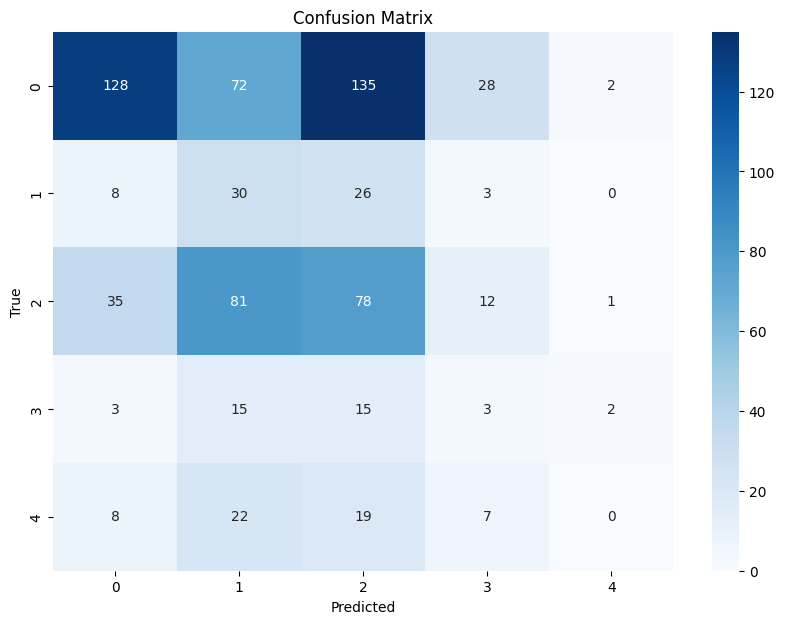

Epoch 1, Train Loss: 1.557146273883043, Train Accuracy: 29.84083044982699%, Test Loss: 1.477718346827739, Test Accuracy: 32.605729877216916%


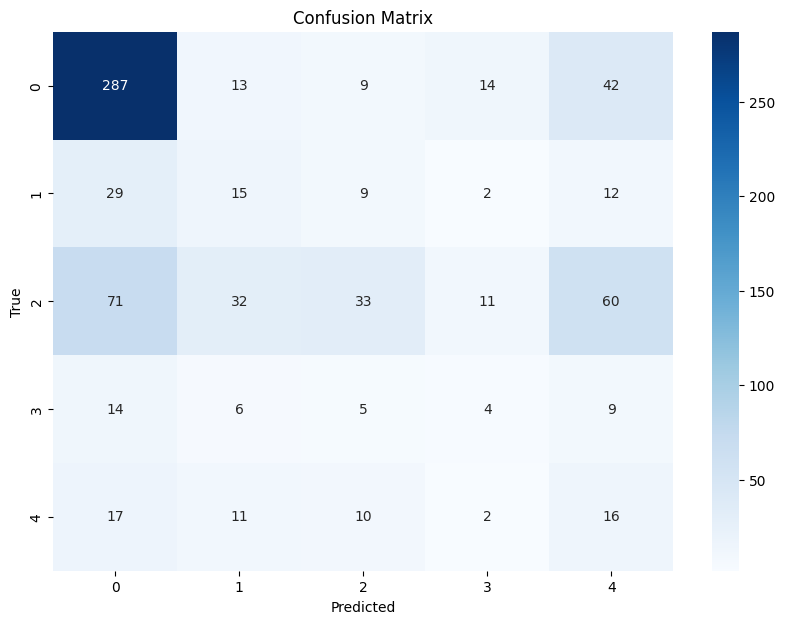

Epoch 2, Train Loss: 1.3657356131393297, Train Accuracy: 41.05190311418685%, Test Loss: 1.278674201385395, Test Accuracy: 48.43110504774898%


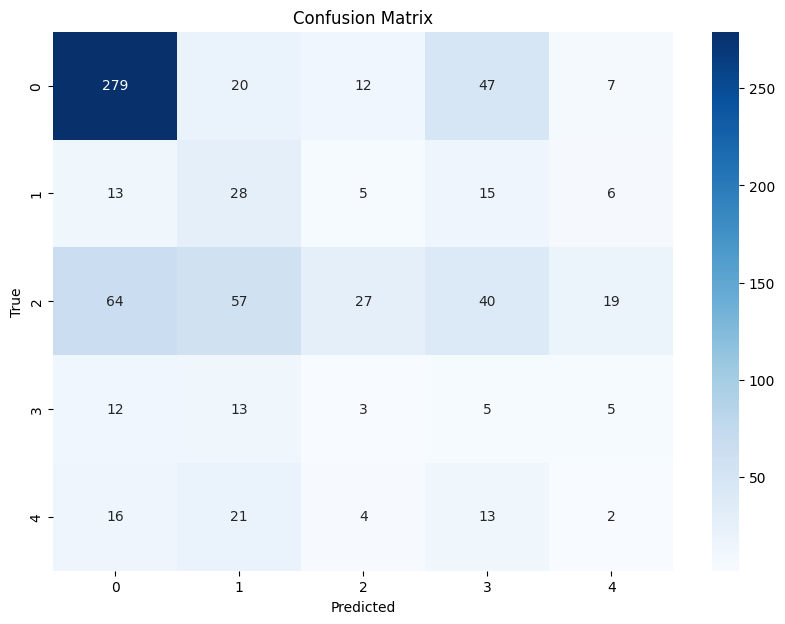

Epoch 3, Train Loss: 1.1994970686140314, Train Accuracy: 49.34256055363322%, Test Loss: 1.3223034336760238, Test Accuracy: 46.52114597544338%


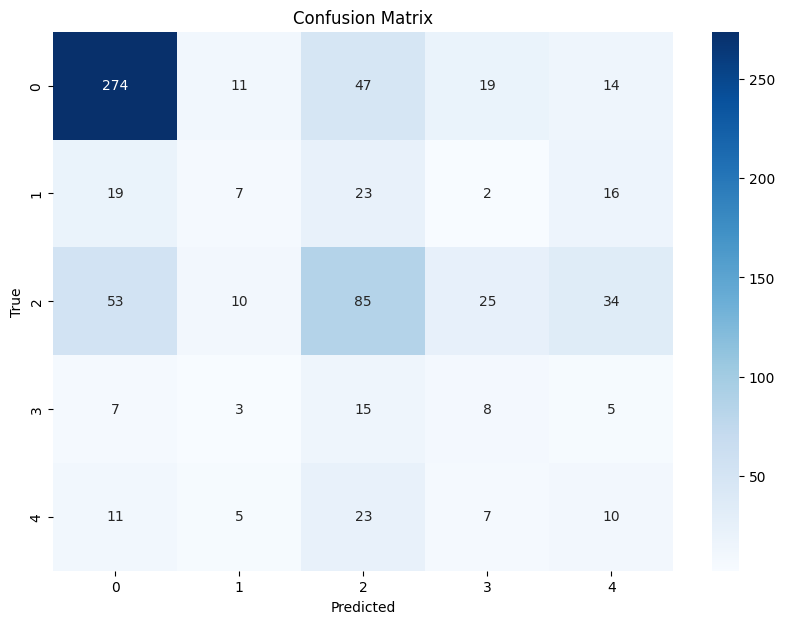

Epoch 4, Train Loss: 1.0270155117047572, Train Accuracy: 58.21453287197232%, Test Loss: 1.29055794066674, Test Accuracy: 52.38744884038199%


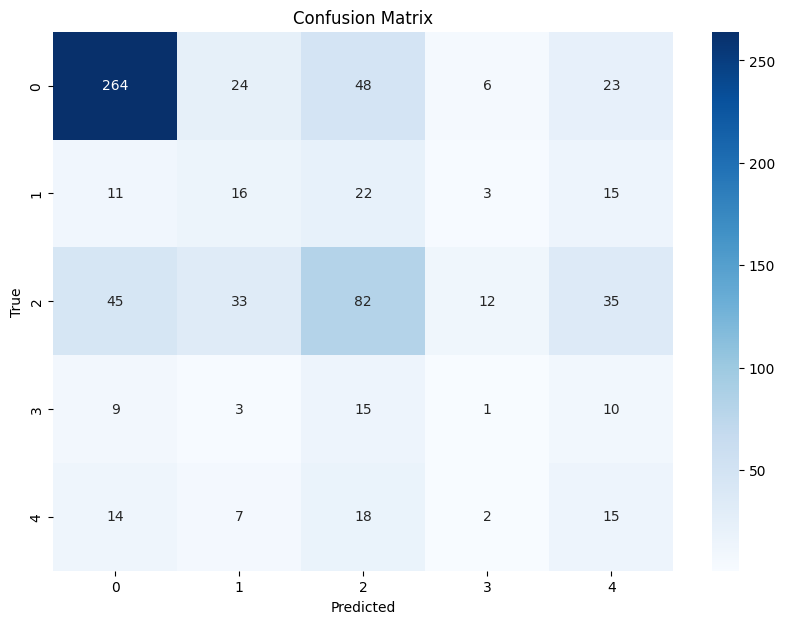

Epoch 5, Train Loss: 0.8210808208822149, Train Accuracy: 68.84429065743944%, Test Loss: 1.4228556615275305, Test Accuracy: 51.56889495225102%


In [13]:
def train(model, train_loader, test_loader, criterion, optimizer, scheduler=None, epochs=5):
    train_losses, test_losses = [], []
    train_accuracies, test_accuracies = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct, total = 0, 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_loss = running_loss / len(train_loader)
        train_accuracy = 100 * correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        test_loss, test_accuracy = validate(model, test_loader, criterion)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}, Train Loss: {train_loss}, Train Accuracy: {train_accuracy}%, Test Loss: {test_loss}, Test Accuracy: {test_accuracy}%")

        if scheduler:
            scheduler.step()

    return train_losses, test_losses, train_accuracies, test_accuracies

def validate(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0
    correct, total = 0, 0
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    test_loss = running_loss / len(test_loader)
    test_accuracy = 100 * correct / total

    # Compute confusion matrix
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    return test_loss, test_accuracy

# Assuming you have train_loader and test_loader already defined
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

train_losses, test_losses, train_accuracies, test_accuracies = train(
    model, train_loader, test_loader, criterion, optimizer, scheduler, epochs=5
)

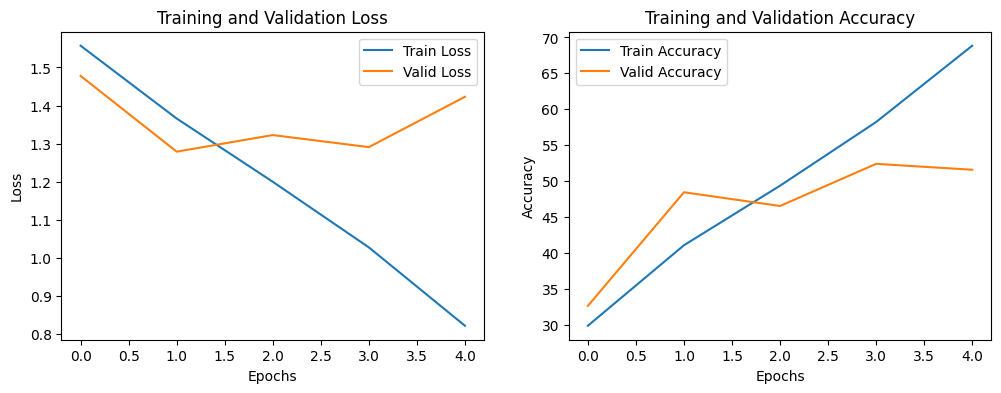

In [14]:
#Plotting training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Valid Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Valid Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()